In [15]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os
import sklearn

import pandas as pd

In [16]:
parent_dir = os.path.dirname(os.getcwd())
# Keep first line inside of the data frame

# Drones
drone_df1 = pd.read_csv(parent_dir + r'\data\processed\LOS\Train\UAV\BEEBEERUN.csv', header=None)
drone_df2 = pd.read_csv(parent_dir + r'\data\processed\LOS\Train\UAV\DJI_INSPIRE.csv', header=None)
drone_df3 = pd.read_csv(parent_dir + r'\data\processed\LOS\Train\UAV\DJI_M600.csv', header=None)
drone_df4 = pd.read_csv(parent_dir + r'\data\processed\LOS\Train\UAV\DJI_MAVICPRO.csv', header=None)
drone_df5 = pd.read_csv(parent_dir + r'\data\processed\LOS\Train\UAV\DJI_PHANTOM.csv', header=None)

# UV Controller
controller_df1 = pd.read_csv(parent_dir + r'\data\processed\LOS\Train\UAV_Controller\BEEBEERUN.csv', header=None)
controller_df2 = pd.read_csv(parent_dir + r'\data\processed\LOS\Train\UAV_Controller\DJI_INSPIRE.csv', header=None)
controller_df3 = pd.read_csv(parent_dir + r'\data\processed\LOS\Train\UAV_Controller\DJI_M600.csv', header=None)
controller_df4 = pd.read_csv(parent_dir + r'\data\processed\LOS\Train\UAV_Controller\DJI_MAVICPRO.csv', header=None)
controller_df5 = pd.read_csv(parent_dir + r'\data\processed\LOS\Train\UAV_Controller\DJI_PHANTOM.csv', header=None)

# Noise
noise_df1 = pd.read_csv(parent_dir + r'\data\processed\LOS\Train\BLUETOOTH\Noise1.csv', header=None)
noise_df2 = pd.read_csv(parent_dir + r'\data\processed\LOS\Train\BLUETOOTH\Noise2.csv', header=None)
noise_df3 = pd.read_csv(parent_dir + r'\data\processed\LOS\Train\BLUETOOTH\Noise3.csv', header=None)
noise_df4 = pd.read_csv(parent_dir + r'\data\processed\LOS\Train\BLUETOOTH\Noise4.csv', header=None)
noise_df5 = pd.read_csv(parent_dir + r'\data\processed\LOS\Train\BLUETOOTH\Noise5.csv', header=None)

In [17]:
def printfirstrow(df):
    print(df.head(1))

dataframes = [drone_df1, drone_df2, drone_df3, drone_df4, drone_df5, controller_df1, controller_df2, controller_df3, controller_df4, controller_df5, noise_df1, noise_df2, noise_df3, noise_df4, noise_df5]



In [18]:
def drop_non_numeric_columns(df):
    df.drop(df.columns[1024:], axis=1, inplace=True)

for i in dataframes:
    drop_non_numeric_columns(i)
    print(i.shape)


(35000, 1024)
(35000, 1024)
(35000, 1024)
(35000, 1024)
(35000, 1024)
(24500, 1024)
(35000, 1024)
(35000, 1024)
(35000, 1024)
(35000, 1024)
(34900, 1024)
(35000, 1024)
(35000, 1024)
(35000, 1024)
(24500, 1024)


In [11]:
# For the data frames that start with drone, add a column of 1's to the end of the data frame
# For the data frames that start with controller, add a column of 0's to the end of the data frame

def add_label_column(df, label):
    df['Label'] = label

for i in dataframes:
    if i is drone_df1 or i is drone_df2 or i is drone_df3 or i is drone_df4 or i is drone_df5:
        add_label_column(i, 1)
    else:
        add_label_column(i, 0)

# Combine all data frames into one
combined_df = pd.concat(dataframes, ignore_index=True)

In [19]:
combined_df.head(20)

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,Label
0,4500,-19860,-32736,-29484,-10688,13276,29704,29292,12200,-12216,...,21936,-128,-23184,-32736,-27012,-6320,17228,30720,27400,0
1,-11372,-6180,1808,8272,9604,4824,-3692,-10788,-11984,-6924,...,8808,11412,6664,-2480,-10736,-13572,-9276,-108,8444,0
2,-31416,-32736,-28732,-372,27924,30720,28204,-964,-29772,-32736,...,4100,-25372,-32736,-32736,-7012,22572,30720,30720,5652,0
3,30720,30720,10616,-19424,-32736,-32736,-11300,16724,30720,30720,...,-32736,-26448,4796,30720,30720,24996,-5768,-32736,-32736,0
4,-17312,-14340,-3824,8052,14384,12036,2544,-9052,-16104,-14360,...,-32736,-9892,19404,30720,30720,10824,-19028,-32736,-32736,1
5,9420,13296,8952,-1064,-11096,-15492,-11648,-1732,8584,13300,...,4444,11096,11088,4440,-5684,-13304,-13736,-7204,2584,0
6,-5480,-4844,-2100,1208,3208,2540,-316,-3268,-4892,-4808,...,-4092,-6460,-5740,-2548,1260,3780,3724,1068,-2752,0
7,-20544,9532,30720,30720,21688,-9944,-32736,-32736,-23600,5992,...,-32736,-29996,-1084,27948,30720,28204,-544,-29544,-32736,0
8,3812,13444,15352,8212,-4232,-15032,-17996,-11716,28,11124,...,-6920,5760,14740,15328,7132,-5880,-16328,-17888,-10268,0
9,-32736,-12220,15980,30720,30720,20648,-7988,-32508,-32736,-31036,...,-7036,20708,30720,30720,13560,-15520,-32736,-32736,-25904,0


In [20]:
combined_df.shape

(503900, 1025)

Epoch 1/50
5035/5039 [============================>.] - ETA: 0s - loss: 0.4981 - accuracy: 0.7358
Epoch 1: val_accuracy improved from -inf to 0.77171, saving model to best_model.h5
5039/5039 [==============================] - 49s 9ms/step - loss: 0.4981 - accuracy: 0.7358 - val_loss: 0.4332 - val_accuracy: 0.7717
Epoch 2/50
5039/5039 [==============================] - ETA: 0s - loss: 0.4644 - accuracy: 0.7579
Epoch 2: val_accuracy improved from 0.77171 to 0.77581, saving model to best_model.h5
5039/5039 [==============================] - 38s 7ms/step - loss: 0.4644 - accuracy: 0.7579 - val_loss: 0.4284 - val_accuracy: 0.7758
Epoch 3/50
5037/5039 [============================>.] - ETA: 0s - loss: 0.4534 - accuracy: 0.7649
Epoch 3: val_accuracy improved from 0.77581 to 0.78269, saving model to best_model.h5
5039/5039 [==============================] - 39s 8ms/step - loss: 0.4534 - accuracy: 0.7649 - val_loss: 0.4158 - val_accuracy: 0.7827
Epoch 4/50
5032/5039 [===========================

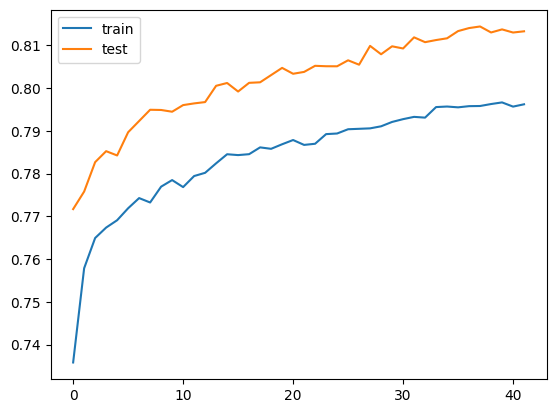

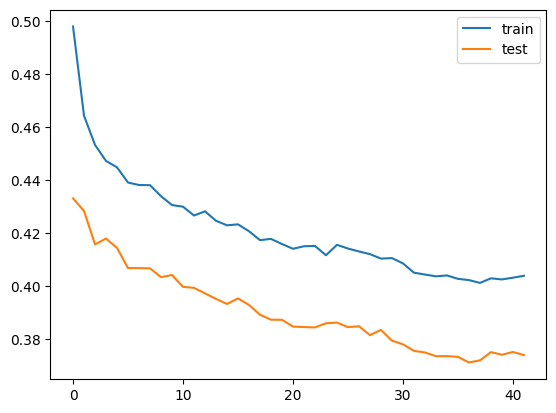

3150/3150 [==============================] - 10s 3ms/step
0.8136832704901766


In [25]:
#Split the data into train and test using sklearn
from sklearn.model_selection import train_test_split

X = combined_df.iloc[:, :-1]
y = combined_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train LSTM model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Flatten, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Reshape data for LSTM
X_train = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Callbacks
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# Fit model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[es, mc])

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Evaluate model
model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

# Print accuracy
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred.round()))

